In [ ]:
# Printing each image year wise
import tifffile
import matplotlib.pyplot as plt
import numpy as np



# Replace 'your_image.tif' with the path to your time series satellite image file in TIFF format
image_path = '/content/MODMYD09cloud_EVImax_2000_2022_CLM.tiff'

# Open the TIFF image file
image_stack = tifffile.imread(image_path)


# Reshape the image_stack to have dimensions (height, width, 12, 22)
reshaped_stack = image_stack.reshape((image_stack.shape[0], image_stack.shape[1], 12, -1))

# Calculate the mean for each pixel and each month, ignoring NaN values
mean_values_month_wise = np.nanmean(reshaped_stack, axis=3)

# Calculate the standard deviation for each pixel and each month, ignoring NaN values
std_values_month_wise = np.nanstd(reshaped_stack, axis=3)

In [ ]:
from google.colab import drive
import pickle


drive.mount('/content/gdrive')
with open('/content/gdrive/My Drive/nan_filled_stack.pkl', 'rb') as file:
    loaded_array = pickle.load(file)

loaded_array

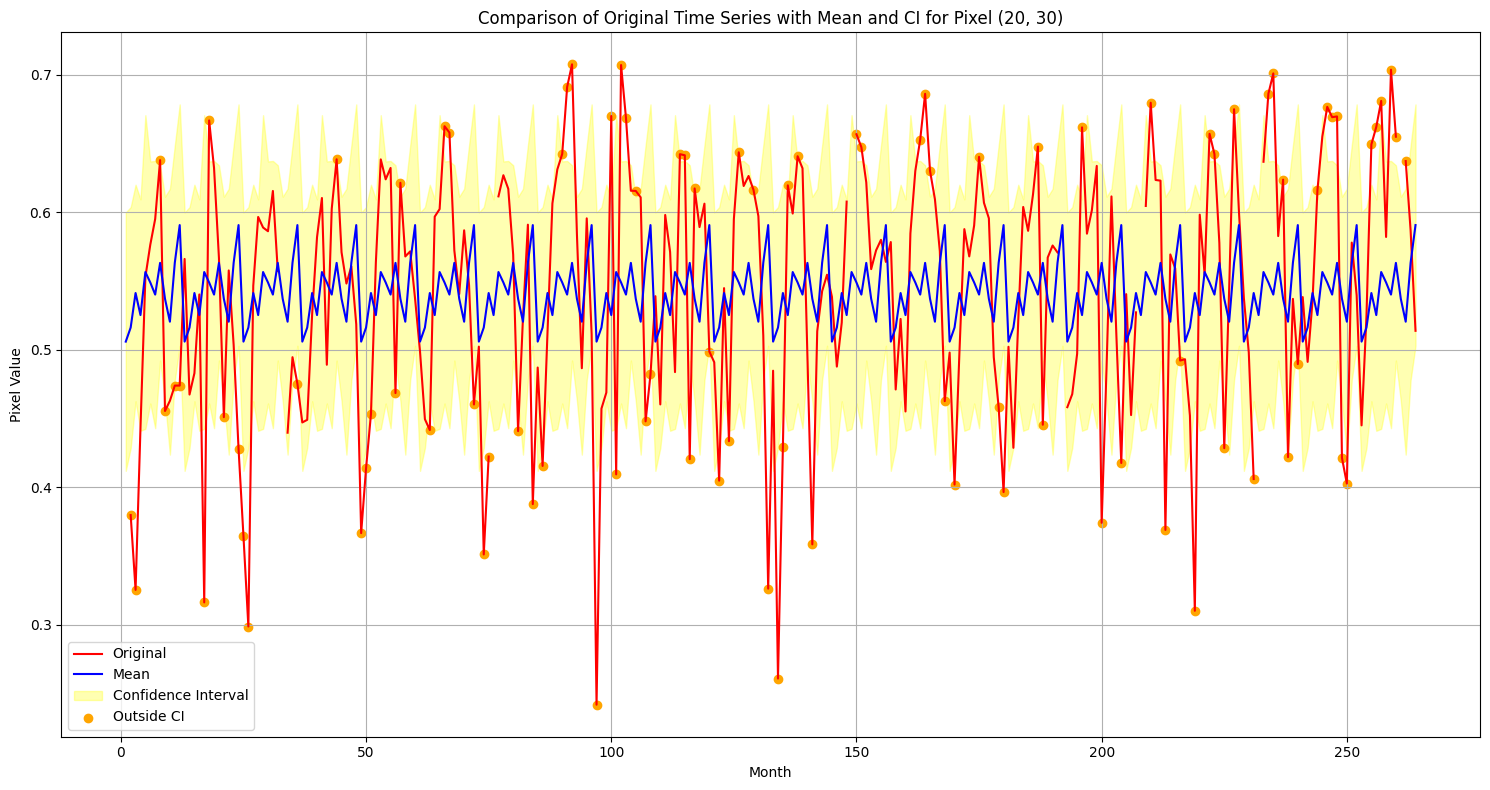

In [ ]:

# Get the number of time steps (months)
num_time_steps = image_stack.shape[2]

# Choose a specific pixel location (replace these with the coordinates of the pixel you're interested in)
pixel_row = 20
pixel_col = 30

# Extract the mean and SD time series for the chosen pixel
mean_pixel_values = mean_values_month_wise[pixel_row, pixel_col, :]
std_pixel_values = std_values_month_wise[pixel_row, pixel_col, :]

# Calculate upper and lower bounds
upper_bound = mean_pixel_values + 3*std_pixel_values
lower_bound = mean_pixel_values - 3*std_pixel_values

# Calculate total number of months in the original time series
total_months = image_stack.shape[2]

# Calculate total number of years
total_years = total_months // 12

# Repeat mean and std values for each month and each year to match the shape of image_stack
mean_pixel_values_concatenated = np.tile(mean_pixel_values, total_years)
upper_bound_concatenated = np.tile(upper_bound, total_years)
lower_bound_concatenated = np.tile(lower_bound, total_years)

# Create a mask for values outside the confidence interval
outside_interval = (image_stack[pixel_row, pixel_col, :] > upper_bound_concatenated) | (image_stack[pixel_row, pixel_col, :] < lower_bound_concatenated)

# Plot the original time series, mean, and CI for the entire period
plt.figure(figsize=(15, 8))

# Plot original time series
plt.plot(np.arange(1, total_months + 1), image_stack[pixel_row, pixel_col, :], linestyle='-', color='r', label='Original')

# Plot mean with CI
plt.plot(np.arange(1, total_months + 1), mean_pixel_values_concatenated, linestyle='-', color='b', label='Mean')
plt.fill_between(np.arange(1, total_months + 1), upper_bound_concatenated, lower_bound_concatenated, color='yellow', alpha=0.3, label='Confidence Interval')

# Highlight portions of the original graph outside the confidence interval with a different color
plt.scatter(np.arange(1, total_months + 1)[outside_interval], image_stack[pixel_row, pixel_col, :][outside_interval], color='orange', label='Outside CI')

plt.title(f'Comparison of Original Time Series with Mean and CI for Pixel ({pixel_row}, {pixel_col})')
plt.xlabel('Month')
plt.ylabel('Pixel Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
